# HAR using Support Vector Machine (SVM)

Link to Download DataSet : [dataset](http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions)

In [3]:
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# Defining a funtion to load a single file as a numpy array
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

train_X = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Train\X_train.txt')  # Training learning variables
test_X = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Test\X_test.txt')     # Testing leaning variable
train_y= load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Train\y_train.txt')  # Training labels variables
test_y = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Test\y_test.txt')     # Testing labels variables

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
train_y = train_y.reshape(train_y.shape[0],)
test_y = test_y.reshape(test_y.shape[0],)
print(train_X.shape)
print(test_y.shape)

(7767, 561)
(3162,)


# SVM kernel = Radial basis function

In [29]:
rbf_clf = svm.SVC()
rbf_clf.fit(train_X,train_y)
y_predict = rbf_clf.predict(test_X)
# calculating training and testing accuracy
acc_test = rbf_clf.score(test_X,test_y)
acc_train = rbf_clf.score(train_X,train_y)
print(acc_test)
print(acc_train)

0.941808981657179
0.9858375177031029


# Evaluation

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

labels = ['WALKING','WALKING_UPSTAIRS ','WALKING_DOWNSTAIRS','SITTING ','STANDING','LAYING ','STAND_TO_SIT','SIT_TO_STAND',' SIT_TO_LIE',
                  'LIE_TO_SIT  ','STAND_TO_LIE ','LIE_TO_STAND ']


In [12]:
# function for plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       496
           2       0.93      0.98      0.95       471
           3       0.94      0.92      0.93       420
           4       0.93      0.93      0.93       508
           5       0.94      0.94      0.94       556
           6       1.00      1.00      1.00       545
           7       0.90      0.78      0.84        23
           8       1.00      0.90      0.95        10
           9       0.72      0.72      0.72        32
          10       0.77      0.68      0.72        25
          11       0.78      0.71      0.74        49
          12       0.69      0.67      0.68        27

    accuracy                           0.94      3162
   macro avg       0.88      0.85      0.86      3162
weighted avg       0.94      0.94      0.94      3162

Confusion matrix, without normalization
[[473   6  17   0   0   0   0   0   0   0   0   0]
 [  9 461   1   0   0   0   0   0   0   0 

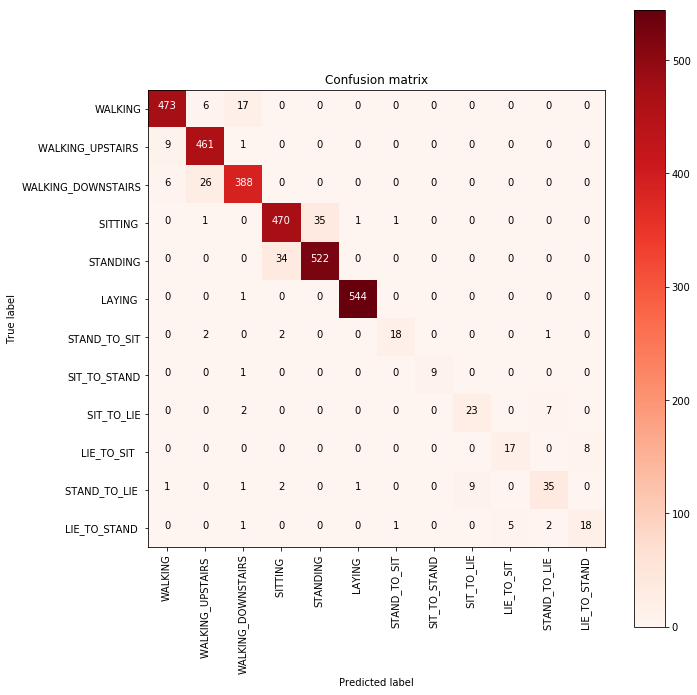

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_predict)
np.set_printoptions(precision=2)

print (classification_report(test_y, y_predict))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')

In [14]:
from sklearn.metrics import f1_score
f1_score(test_y, y_predict, average='weighted')

0.9414452395945963

# SVM kernel = Linear

In [26]:
# Building Model
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(train_X,train_y)
y_pred = linear_clf.predict(test_X)

# Calculating Test accuracy
acc_test = linear_clf.score(test_X,test_y)
print(acc)

0.9487666034155597


In [28]:
#calculating train accuracy
acc_train = linear_clf.score(train_X,train_y)
print(acc_train)

0.9970387537015579


* training accuracy is greater than testing accuracy implies model might be overfitting!

# Evaluation

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       496
           2       0.96      0.97      0.97       471
           3       0.97      0.96      0.97       420
           4       0.95      0.91      0.93       508
           5       0.92      0.96      0.94       556
           6       1.00      1.00      1.00       545
           7       0.77      0.74      0.76        23
           8       0.91      1.00      0.95        10
           9       0.60      0.56      0.58        32
          10       0.67      0.72      0.69        25
          11       0.67      0.67      0.67        49
          12       0.67      0.59      0.63        27

    accuracy                           0.95      3162
   macro avg       0.84      0.84      0.84      3162
weighted avg       0.95      0.95      0.95      3162

Confusion matrix, without normalization
[[484   4   8   0   0   0   0   0   0   0   0   0]
 [  8 459   4   0   0   0   0   0   0   0 

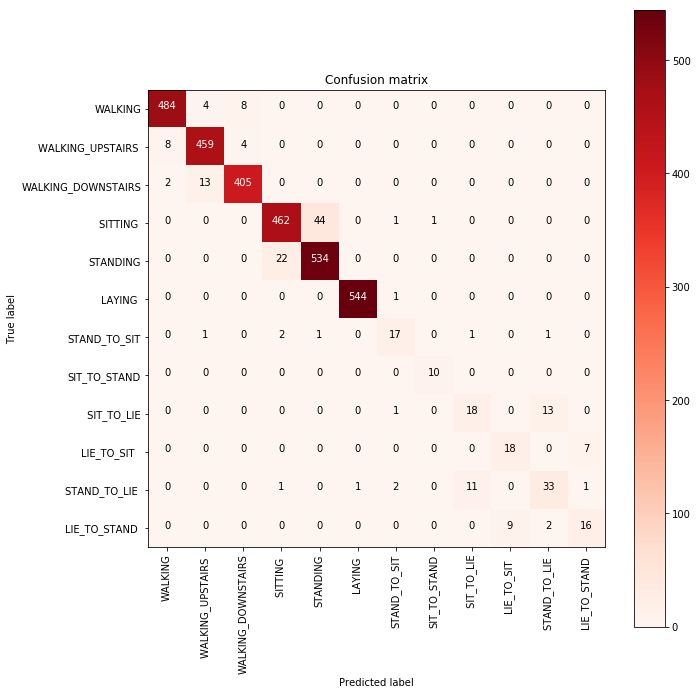

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2)

print (classification_report(test_y, y_pred))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')

In [17]:
f1_score(test_y, y_pred, average='weighted')

0.9485088668644583

# SVM kernel = Polynomial

In [30]:
linear_clf = svm.SVC(kernel='poly', degree = 2)
linear_clf.fit(train_X,train_y)
y_prd = linear_clf.predict(test_X)
acc_test = linear_clf.score(test_X,test_y)
acc_train = linear_clf.score(train_X,train_y)
print(acc_test)
print(acc_train)

0.92662871600253
0.9813312733359083


with polynomial of degree 3 or higher accuracy decreases!

# Evaluation

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       496
           2       0.91      0.95      0.93       471
           3       0.98      0.86      0.92       420
           4       0.85      0.92      0.88       508
           5       0.93      0.94      0.93       556
           6       0.99      1.00      1.00       545
           7       0.85      0.74      0.79        23
           8       1.00      0.90      0.95        10
           9       0.72      0.72      0.72        32
          10       0.74      0.80      0.77        25
          11       0.75      0.67      0.71        49
          12       0.80      0.59      0.68        27

    accuracy                           0.93      3162
   macro avg       0.87      0.84      0.85      3162
weighted avg       0.93      0.93      0.93      3162

Confusion matrix, without normalization
[[469   1   5  21   0   0   0   0   0   0   0   0]
 [ 13 449   1   6   2   0   0   0   0   0 

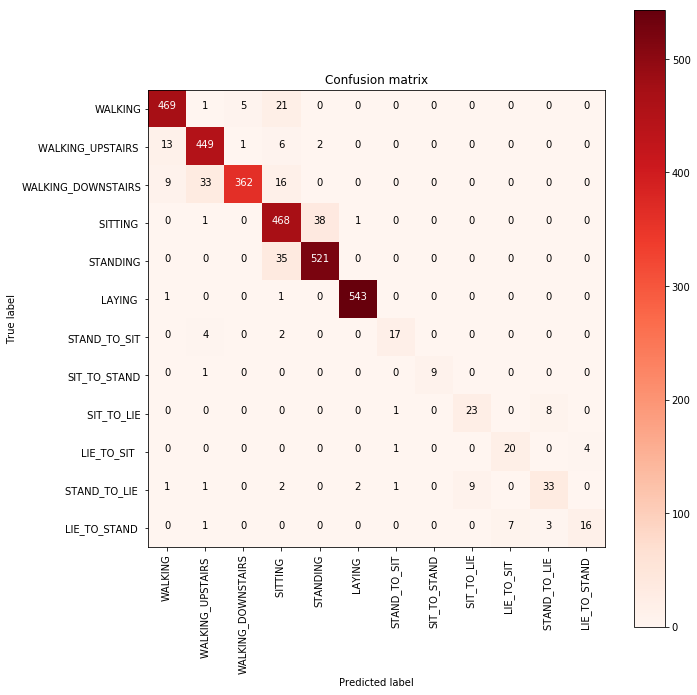

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_prd)
np.set_printoptions(precision=2)

print (classification_report(test_y, y_prd))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')

In [25]:
f1_score(test_y, y_prd, average='weighted')

0.9263729430292081

# Conclusion:
with kernel LINEAR we got the best accuracy of 94.87% !
further_work: trying cross validation approach to avoid overfitting and to get better accuracy